   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


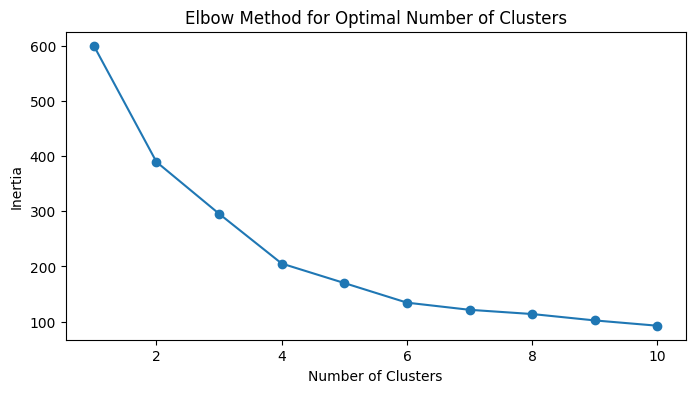

Silhouette Score: 0.4039582785148566


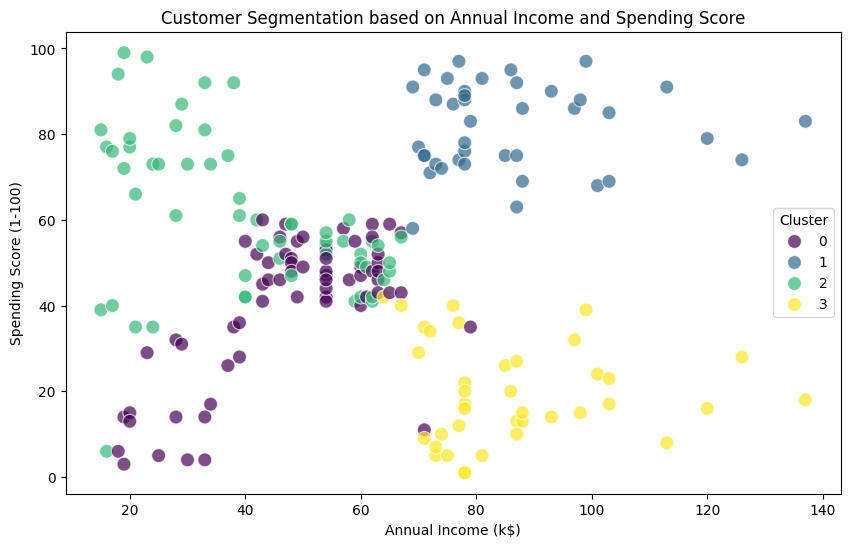

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 1: Load the dataset
url = "CustomerData (1).csv"
data = pd.read_csv(url)

# Step 2: Explore the data
# Display the first few rows of the dataset along with column names for inspection
print(data.head())
print(data.columns)

# Step 3: Select the relevant features for clustering
# Here, we are using 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' for the clustering process
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

# Step 4: Data Preprocessing
# Standardize the features to enhance the performance of the K-Means algorithm
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Identify the optimal number of clusters using the Elbow Method
inertia_values = []  # List to store the inertia values (within-cluster sum of squares)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve to visualize the optimal number of clusters
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Step 6: Train the K-Means model with the chosen number of clusters
# Based on the elbow plot, we select the optimal number of clusters, which is 4 in this case
optimal_clusters = 4
kmseans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)

# Step 7: Analyze and visualize the clusters
# Add the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Calculate and display the silhouette score to evaluate the quality of clustering
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

# Visualize the clusters based on 'Annual Income (k$)' and 'Spending Score (1-100)'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segmentation based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()
